#Support Vector Machines 1
##Introduction
*This example is a ground up simple tutorial which requires no previous knowledge*


A Support Vector Machine (SMV) is a type of machine learning model invented by Vladimir Vapnik. An SVM consists of a maximally separating hyperplane that can be used to classify data. This notebook is designed to show a simple application of an SVM in 2D. Each sample in the dataset has two features (X and Y coordinates) and belongs to one of two classes. The final SVM will consist of a set of two weights that can be used to classify the data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

##Data
To get started building an SVM we need data. Our dataset needs to include a set of samples each of which has a classification and a set of features. In our case we are using a set of points in the plane, so each data point has two features (an x value and a y value). Each data point will also have a class (either 1 or -1). In the code, __X__ contains the x,y coordinates of each point and __Y__ contains the associated classes
##Formal Math
Using set terminology, we say:
\begin{align}
S = \big\{\big(x_i,y_i\big)\big\}^m_i , where i = 1, x_i \in \mathbb{R}, and y_i \in \{+1,-1\}
\end{align}

The general formula for a hyperplane is the set of points where:
\begin{align}
\vec{w}\cdot\vec{x}-b = 0
\end{align}
where __w__ is a vector of weights and __x__ is an m-dimensional set of features
In 2D this is:
\begin{align}
\big((w_1 \times x_1)+(w_2 \times x_2)\big)-b = 0
\end{align}

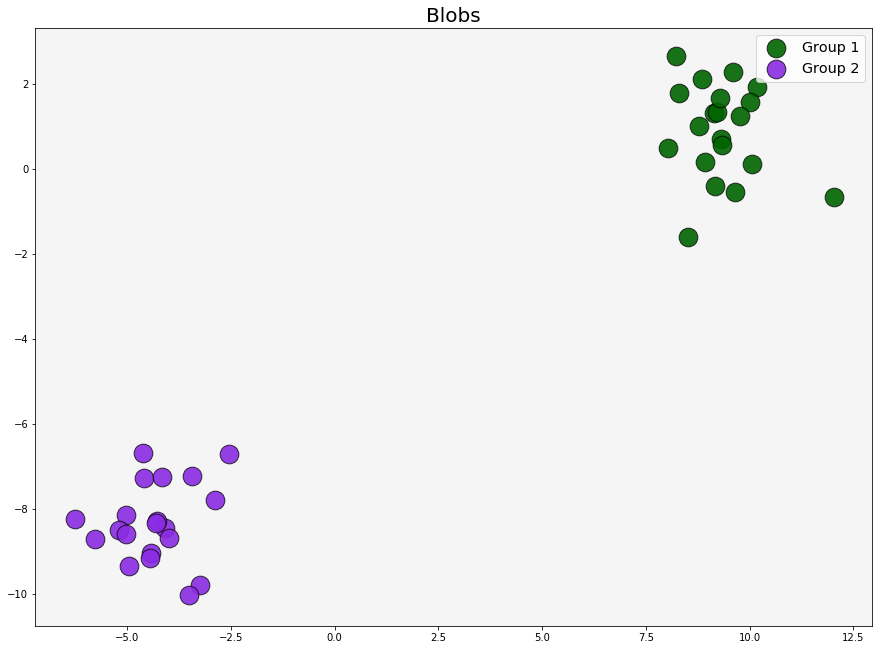

In [43]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples = 40,centers=2, n_features=2,random_state=45)

#convert to -1's and 1's
for i,j in enumerate(Y):
    if j == 0:
        Y[i] = -1
    elif j == 1:
        Y[i] = 1
        
#group for plotting
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
names = {-1:'Group 1', 1:'Group 2'}
colors = {-1:(0,100/255,0,0.9), 1:(138/255,43/255,226/255,0.9)}
grouped = df.groupby('label')

#plot the data
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Blobs", fontsize=20)
ax.set_facecolor((245/255,245/255,245/255))

for key, group in grouped:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolor=(0,0,0,0.75),s=350)
ax.legend(markerscale=1,fontsize="x-large")
plt.show()

In [44]:
#prepare datasets
#test sets
x_test = X[20:]
x_test = np.c_[x_test,np.ones(len(x_test))]
y_test = Y[20:]

#training sets
x = X[:20]
y = Y[:20]
#group for plotting
df_train = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
grouped_train = df_train.groupby('label')

#add bias to sample vectors
x = np.c_[x,np.ones(len(x))]

#initialize weight vector
w = np.zeros(len(x[0]))

In [64]:
#learning rate 
lam = 0.001
#array of number for shuffling
order = np.arange(0,len(x),1)

start_time = time.time()
support_vectors = 0
not_converged = True

while(not_converged):
    t += 1
    support_vectors = 0
    eta = 1/(lam*t)
    fac = (1-(eta*lam))*w
    random.shuffle(order)
    for i in order:   #for implementing subset[:k]: 
        if (round((y[i]*np.dot(x[i],w))) == 1):
            support_vectors += 1
        #misclassification
        if (y[i]*np.dot(x[i],w)) < 1 :
            w = fac + eta*y[i]*x[i]
            #break #for implementing k=1 version of pegasos
        #correct classification
        else:
            w = fac
            #break #for implementing k=1 version of pegasos
            
    if(support_vectors > 2):
        not_converged = False
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0005152225494384766 seconds ---


In [65]:
#create grid to draw decision boundary
grid_res = 300
xline = np.linspace(min(X[:,0]-(0.5*np.std(X[:,0]))),max(X[:,0]+(0.5*np.std(X[:,0]))),grid_res)
yline = np.linspace(min(X[:,1]-(0.5*np.std(X[:,1]))),max(X[:,1]+(0.5*np.std(X[:,1]))),grid_res)
grid = []
gridy = []
for i in range(grid_res):
    for j in range(grid_res):
        grid.append([xline[i],yline[j]])
        if (np.dot(w,[xline[i],yline[j],1]))>1:
            gridy.append((138/255,43/255,226/255,0.1))
            #gridy.append('lightsteelblue')
        elif (np.dot(w,[xline[i],yline[j],1]))<-1:
            gridy.append((0,100/255,0,0.1))
            #gridy.append('steelblue')
        elif (round((np.dot(w,[xline[i],yline[j],1])),2) == 0):
            gridy.append((0,0,0,1))
        else:
            gridy.append((245/255,245/255,245/255))
            
grid = np.asarray(grid)
gridy = np.asarray(gridy)

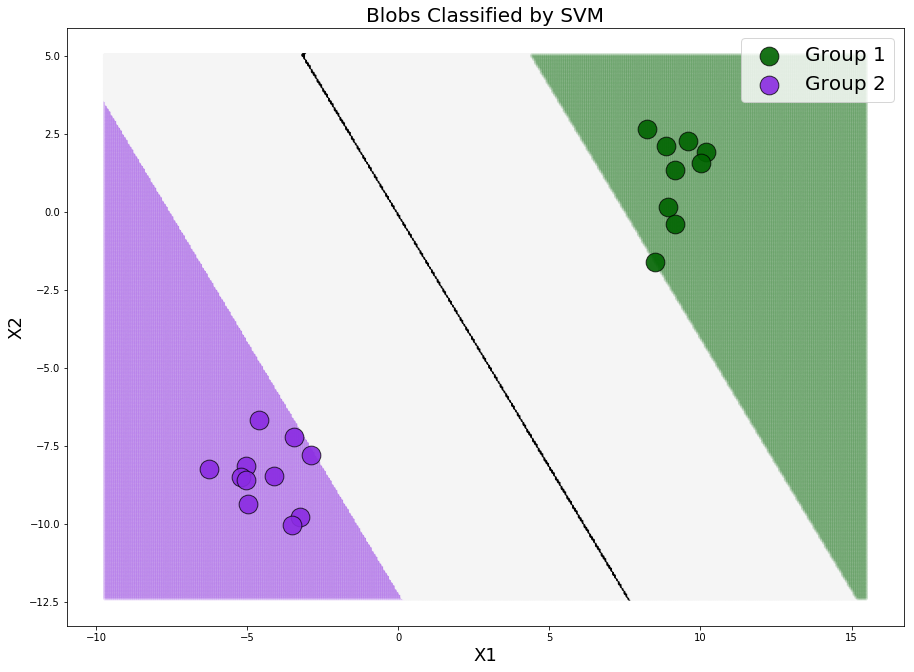

In [66]:
#plot the data
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Blobs Classified by SVM", fontsize=20)
ax.set_xlabel("X1", fontsize=18)
ax.set_ylabel("X2", fontsize=18)
ax.scatter(grid[:,0], grid[:, 1], marker='o',c=gridy,s=10)
for key, group in grouped_train:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolor=(0,0,0,0.75),s=350)
ax.legend(markerscale=1,fontsize=20,fancybox=True)
plt.show()

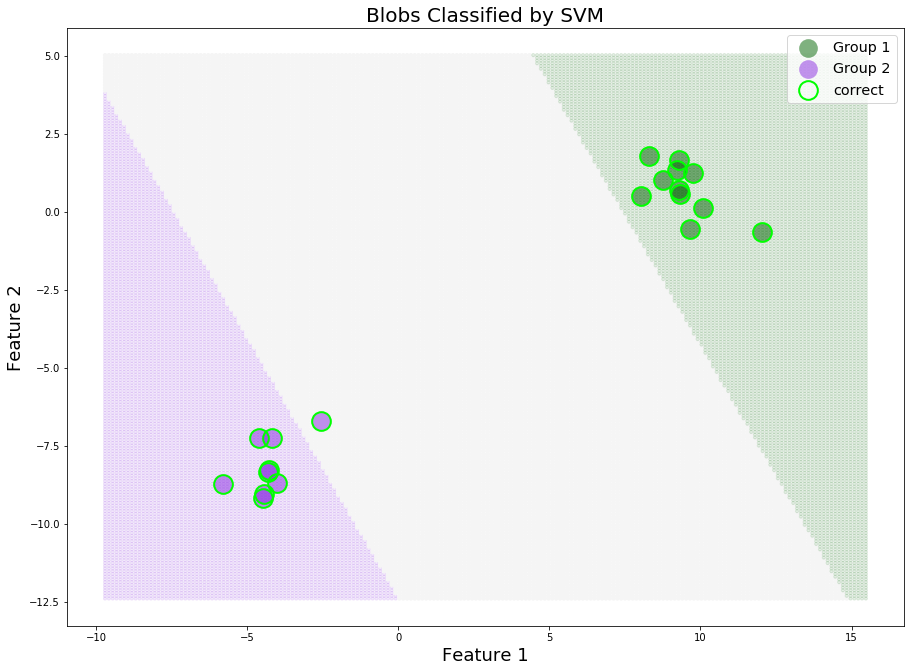

In [69]:
#test classifier on test set
y_pred = ([])
for i in x_test:
    pred = np.dot(w,i)
    if(pred > 0):
        {y_pred.append(1)}
    elif(pred < 0):
        y_pred.append(-1)
        

y_pred_labels =([])
for i,val in enumerate(y_pred):
    if(y_test[i] == y_pred[i]):
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)
        
#group for plotting
df_test = pd.DataFrame(dict(x=x_test[:,0], y=x_test[:,1], pred=y_pred_labels,label=y_test))
grouped_test = df_test.groupby('label')
grouped_pred = df_test.groupby('pred') 
pred_colors = {1:'lime', 0:'red'}
pred_names = {1:'correct',0:'incorrect'}

#plot decision grid with prediction values
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Blobs Classified by SVM", fontsize=20)
ax.set_xlabel("Feature 1", fontsize=18)
ax.set_ylabel("Feature 2", fontsize=18)
ax.scatter(grid[:,0], grid[:, 1], marker='o',c=gridy,s=10)
for key, group in grouped_test:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolor=(0,0,0,0),s=350)
for key, group in grouped_pred:
    ax.scatter(group.x,group.y,label=pred_names[key],color=(0,0,0,0),linewidth=2,edgecolor=pred_colors[key],s=350)
ax.legend(markerscale=1,fontsize="x-large")
plt.show()
